## Analysis of ally heroes and enemy heroes

In [7]:
import pandas as pd
import os
import glob
from collections import defaultdict

# Initialize dictionaries to store win/loss counts and total matches
ally_wins = defaultdict(int)
ally_total = defaultdict(int)
enemy_wins = defaultdict(int)
enemy_total = defaultdict(int)

# Path to the directory containing match CSV files
match_dir = "csv_data/"
csv_files = glob.glob(os.path.join(match_dir, "*.csv"))

# Process each file
for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    match_data = pd.read_csv(csv_file)
    # Process each row in the CSV
    for _, row in match_data.iterrows():
        # Determine if the player won
        player_win = row['player_win']

        # Update ally stats
        for ally_column in ['A1', 'A2', 'A3', 'A4']:
            hero_id = row[ally_column]
            if pd.notna(hero_id):  # Check if the hero ID is valid
                ally_total[hero_id] += 1
                if player_win == 1:  # If the player won, allies also win
                    ally_wins[hero_id] += 1

        # Update enemy stats
        for enemy_column in ['E1', 'E2', 'E3', 'E4', 'E5']:
            hero_id = row[enemy_column]
            if pd.notna(hero_id):  # Check if the hero ID is valid
                enemy_total[hero_id] += 1
                if player_win == 0:  # If the player lost, opponents win
                    enemy_wins[hero_id] += 1

# Calculate win percentages
ally_win_percentages = {hero_id: (ally_wins[hero_id] / ally_total[hero_id]) * 100 for hero_id in ally_total}
enemy_win_percentages = {hero_id: (enemy_wins[hero_id] / enemy_total[hero_id]) * 100 for hero_id in enemy_total}

# Create DataFrame including the total matches
win_percentages_df = pd.DataFrame({
    'Hero ID': list(ally_win_percentages.keys()),
    'Win % as Ally': list(ally_win_percentages.values()),
    'Ally Matches': [ally_total[hero_id] for hero_id in ally_win_percentages.keys()],
    'Win % as Opponent': [enemy_win_percentages.get(hero_id, 0) for hero_id in ally_win_percentages.keys()],
    'Enemy Matches': [enemy_total.get(hero_id, 0) for hero_id in ally_win_percentages.keys()]
})

# Save results to CSV
win_percentages_df.to_csv("hero_win_percentages.csv", index=False)

# Print a preview of the DataFrame
print(win_percentages_df.head())


Processing file: csv_data/matches_batch_1.csv
Processing file: csv_data/matches_batch_2.csv
Processing file: csv_data/matches_batch_3.csv
Processing file: csv_data/matches_batch_4.csv
   Hero ID  Win % as Ally  Ally Matches  Win % as Opponent  Enemy Matches
0     76.0      50.000000            14          71.428571              7
1     19.0      57.142857             7          85.714286              7
2     30.0      50.000000            10          47.826087             23
3     32.0      35.294118            17          53.846154             26
4     61.0       0.000000             1         100.000000              3


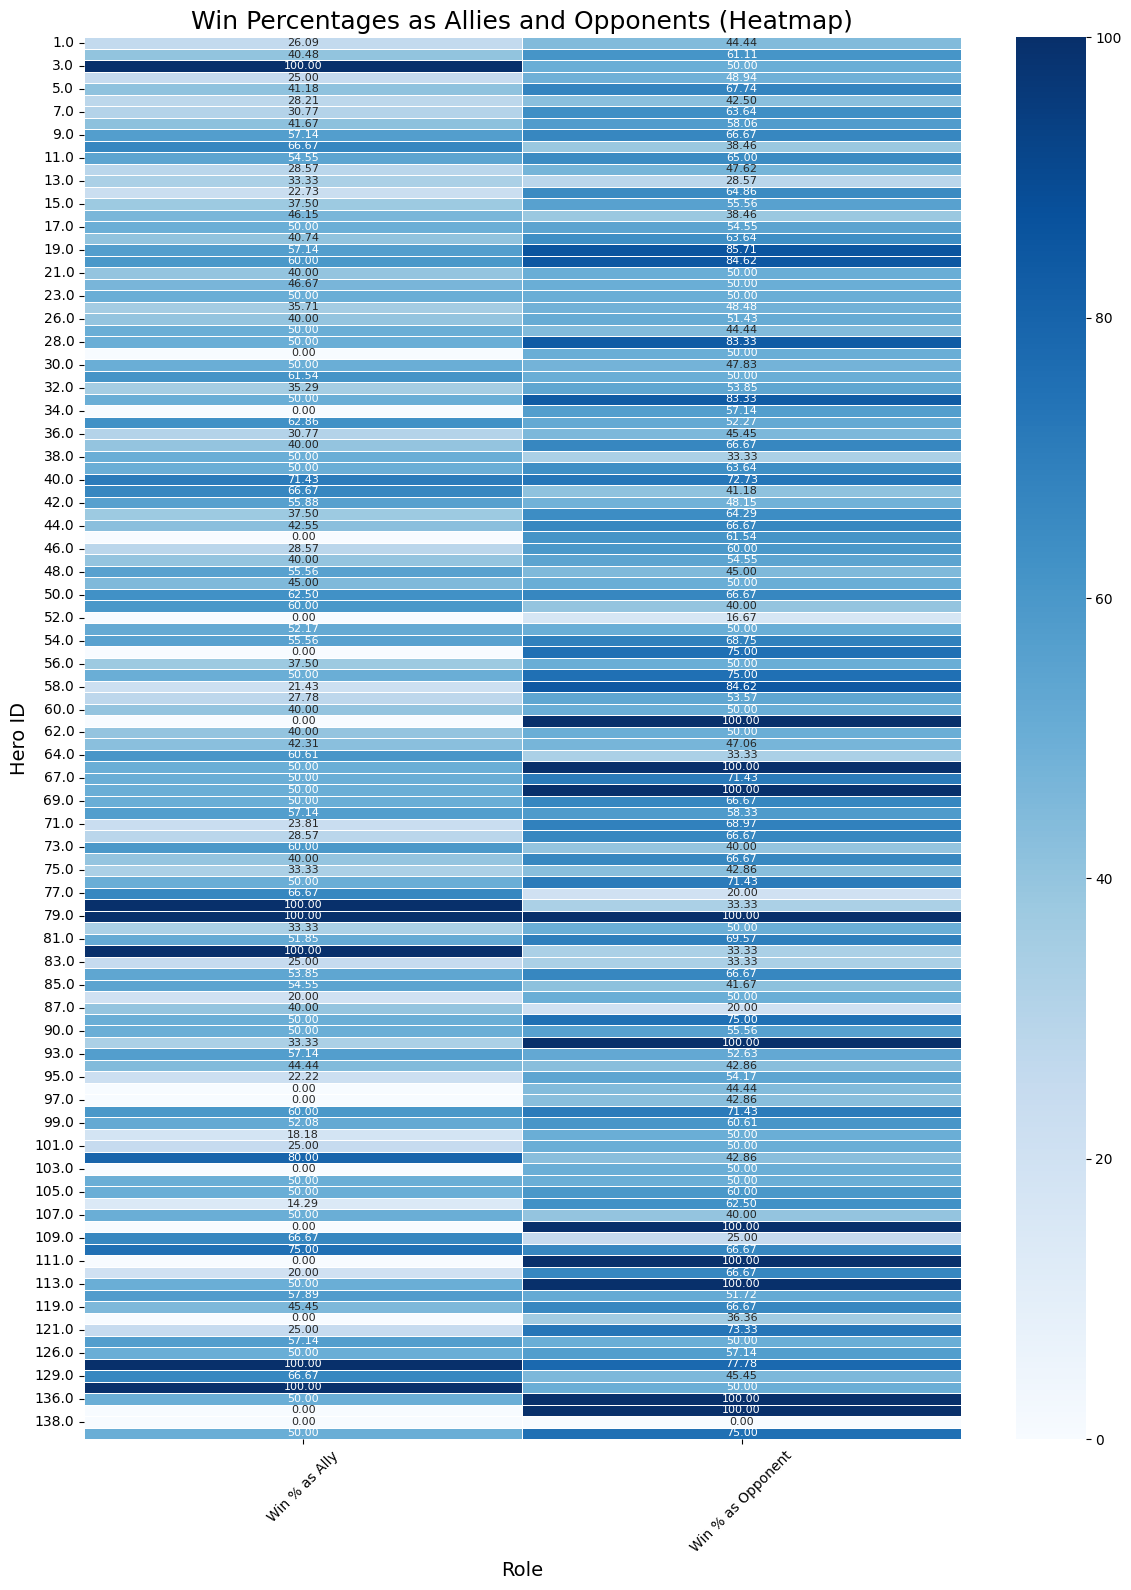

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by Hero ID
heatmap_data = win_percentages_df.set_index('Hero ID')[['Win % as Ally', 'Win % as Opponent']].sort_index()

# Plot the heatmap
plt.figure(figsize=(12, 16))  # Increase figure size
sns.heatmap(
    heatmap_data,
    annot=True,  # Enable annotations
    fmt=".2f",   # Format numbers to 2 decimal places
    cmap="Blues",
    cbar=True,
    annot_kws={"size": 8},  # Reduce annotation font size
    linewidths=0.5,         # Add space between cells
    linecolor='white'       # Use white lines between cells
)

# Add labels and title
plt.title('Win Percentages as Allies and Opponents (Heatmap)', fontsize=18)
plt.xlabel('Role', fontsize=14)
plt.ylabel('Hero ID', fontsize=14)
plt.yticks(rotation=0, fontsize=10)  # Rotate y-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()



## Performance gain analysis for played heroes

## Duration of the match - win relation analysis

## Performance change within one seat for playing analysis

## Performance analysis based on different roles